In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
# Read the dataset

df = pd.read_csv('flights.csv')
print(df.head())

#list the column names
print(df.columns)

#print dimensions of dataset
print(df.shape)

#first 5 rows:
'''
id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
'''

   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01

'\nid,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name\n0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.\n1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.\n2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.\n3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways\n4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.\n'

# Missing Data

In [3]:
# Find the number of na values in each column
print(df.isna().sum())

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64


In [4]:
# Drop all rows containing na values in "dep_delay" and "arr_delay":
df.dropna(subset=['dep_delay', 'arr_delay'], inplace=True)

# K nearest neighbour imputation:
# For Rows with missing values, we will use KNN imputation to fill in the missing values (for cols dep_time, dep_delay, arr_time, arr_delay, air_time)
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time']])
df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time']] = df_imputed

df.reset_index(drop=True, inplace=True)

print(df.isna().sum())
print(f"%loss={float((336776-327346)/336776)}")

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64
%loss=0.02800080765850298


# Data Type Conversion

In [5]:
# The dataset now has no missing values. Now let's remove inconsistent values and outliers.

# "dep_time", "sched_dep_time", "arr_time", and "sched_arr_time" are numbers. 
df['dep_time'] = df['dep_time'].astype(int)
df['sched_dep_time'] = df['sched_dep_time'].astype(int)
df['arr_time'] = df['arr_time'].astype(int)
df['sched_arr_time'] = df['sched_arr_time'].astype(int)

dep_time_invalid = df[(df['dep_time'] >= 2400) | (df['dep_time'] % 100 >= 60)]
arr_time_invalid = df[(df['arr_time'] >= 2400) | (df['arr_time'] % 100 >= 60)]
sched_dep_time_invalid = df[(df['sched_dep_time'] >= 2400) | (df['sched_dep_time'] % 100 >= 60)]
sched_arr_time_invalid = df[(df['sched_arr_time'] >= 2400) | (df['sched_arr_time'] % 100 >= 60)]

if not dep_time_invalid.empty:
    print("Invalid values found in the dep_time column:")
    print(dep_time_invalid)
else:
    print("No invalid values found in the dep_time column.")


Invalid values found in the dep_time column:
            id  year  month  day  dep_time  sched_dep_time  dep_delay  \
54099    54966  2013     10   30      2400            2359        1.0   
79838    80973  2013     11   27      2400            2359        1.0   
86682    87893  2013     12    5      2400            2359        1.0   
89956    91492  2013     12    9      2400            2359        1.0   
89957    91493  2013     12    9      2400            2250       70.0   
93561    95379  2013     12   13      2400            2359        1.0   
98646   100795  2013     12   19      2400            2359        1.0   
107294  109532  2013     12   29      2400            1700      420.0   
114996  117373  2013      2    7      2400            2359        1.0   
114997  117374  2013      2    7      2400            2359        1.0   
117392  120677  2013      2   11      2400            2135      145.0   
146024  150301  2013      3   15      2400            2359        1.0   
152435

In [6]:
if not arr_time_invalid.empty:
    print("Invalid values found in the arr_time column:")
    print(arr_time_invalid)
else:
    print("No invalid values found in the arr_time column.")

Invalid values found in the arr_time column:
            id  year  month  day  dep_time  sched_dep_time  dep_delay  \
810        817  2013      1    1      2209            2155       14.0   
4256      4303  2013      1    5      2116            2130      -14.0   
11147    11249  2013      1   13      2243            2129       74.0   
13780    13918  2013      1   16      2138            2107       31.0   
14729    14916  2013      1   17      2256            2249        7.0   
...        ...   ...    ...  ...       ...             ...        ...   
310111  319126  2013      9   11      2154            2100       54.0   
310863  319939  2013      9   12      2159            1600      359.0   
315391  324706  2013      9   17      2250            2255       -5.0   
319861  329231  2013      9   22      2126            2137      -11.0   
326352  335772  2013      9   29      2249            2250       -1.0   

        arr_time  sched_arr_time  arr_delay  ... flight  tailnum origin dest  

In [7]:
if not sched_dep_time_invalid.empty:
    print("Invalid values found in the sched_dep_time column:")
    print(sched_dep_time_invalid)
else:
    print("No invalid values found in the sched_dep_time column.")

No invalid values found in the sched_dep_time column.


In [8]:
if not sched_arr_time_invalid.empty:
    print("Invalid values found in the sched_arr_time column:")
    print(sched_arr_time_invalid)
else:
    print("No invalid values found in the sched_arr_time column.")

No invalid values found in the sched_arr_time column.


In [9]:
# Converting Scheduled Departure time to datetime object instead of int

# We have a column called "time_hour", and it is a in the format '2013-09-17 14:00:00' but the minute is wrong. We want to correct minute value by using the "minute" column.
# Convert Scheduled Departure time to datetime object
df['time_hour'] = pd.to_datetime(df['time_hour'])

# Convert "minute" column to time delta (in mins)
df['minute'] = pd.to_timedelta(df['minute'], unit='m')

# Add "minute" to "time_hour" to get the correct time
df['sched_dep_time'] = df['time_hour'] + df['minute']

# Print the updated dataframe
print(df)

            id  year  month  day  dep_time      sched_dep_time  dep_delay  \
0            0  2013      1    1       517 2013-01-01 05:15:00        2.0   
1            1  2013      1    1       533 2013-01-01 05:29:00        4.0   
2            2  2013      1    1       542 2013-01-01 05:40:00        2.0   
3            3  2013      1    1       544 2013-01-01 05:45:00       -1.0   
4            4  2013      1    1       554 2013-01-01 06:00:00       -6.0   
...        ...   ...    ...  ...       ...                 ...        ...   
327341  336765  2013      9   30      2240 2013-09-30 22:45:00       -5.0   
327342  336766  2013      9   30      2240 2013-09-30 22:50:00      -10.0   
327343  336767  2013      9   30      2241 2013-09-30 22:46:00       -5.0   
327344  336768  2013      9   30      2307 2013-09-30 22:55:00       12.0   
327345  336769  2013      9   30      2349 2013-09-30 23:59:00      -10.0   

        arr_time  sched_arr_time  arr_delay  ... flight  tailnum origin des

# Invalid Data

In [10]:
# Now let's convert sched_arr_time also to a date time

# First, create 2 new columns "sched_arr_time_hour" and "sched_arr_time_minute" from "sched_arr_time"(which is an int, so %100 should give min and the first 2 digits are hrs)
df['sched_arr_time_hour'] = df['sched_arr_time'] // 100
df['sched_arr_time_minute'] = df['sched_arr_time'] % 100

# Now, create sched_arr_time of type datetime, by combining year, month, day, sched_arr_time_hour, sched_arr_time_minute (which are all integers)
# So, first create a new column that is a string, then convert it to date time. String should be in the format (2013-01-01 23:59:00)

df['sched_arr_time'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['sched_arr_time_hour'].astype(str) + ':' + df['sched_arr_time_minute'].astype(str) + ':00'
# df.head()

# Convert "sched_arr_time" to datetime object
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'])
df.head()


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,sched_arr_time_hour,sched_arr_time_minute
0,0,2013,1,1,517,2013-01-01 05:15:00,2.0,830,2013-01-01 08:19:00,11.0,...,EWR,IAH,227.0,1400,5,0 days 00:15:00,2013-01-01 05:00:00,United Air Lines Inc.,8,19
1,1,2013,1,1,533,2013-01-01 05:29:00,4.0,850,2013-01-01 08:30:00,20.0,...,LGA,IAH,227.0,1416,5,0 days 00:29:00,2013-01-01 05:00:00,United Air Lines Inc.,8,30
2,2,2013,1,1,542,2013-01-01 05:40:00,2.0,923,2013-01-01 08:50:00,33.0,...,JFK,MIA,160.0,1089,5,0 days 00:40:00,2013-01-01 05:00:00,American Airlines Inc.,8,50
3,3,2013,1,1,544,2013-01-01 05:45:00,-1.0,1004,2013-01-01 10:22:00,-18.0,...,JFK,BQN,183.0,1576,5,0 days 00:45:00,2013-01-01 05:00:00,JetBlue Airways,10,22
4,4,2013,1,1,554,2013-01-01 06:00:00,-6.0,812,2013-01-01 08:37:00,-25.0,...,LGA,ATL,116.0,762,6,0 days 00:00:00,2013-01-01 06:00:00,Delta Air Lines Inc.,8,37


In [11]:
# If sched_arr_time is before sched_dep_time, then advance it by one day (No time travel allowed here)

# First count the no. of such occurances:
time_travels = df[df["sched_arr_time"] < df["sched_dep_time"]] # Count all where plane lands before it takes off
time_travels.shape

print(time_travels["sched_arr_time"] - time_travels["sched_dep_time"])

# Now, add 1 day to all such rows
df.loc[df["sched_arr_time"] < df["sched_dep_time"], "sched_arr_time"] = df["sched_arr_time"] + pd.DateOffset(days=1)

time_travels = df[df["sched_arr_time"] < df["sched_dep_time"]] # Count all where plane lands before it takes off
time_travels.shape

715      -1 days +04:47:00
767      -1 days +03:35:00
787      -1 days +04:50:00
788      -1 days +03:07:00
790      -1 days +03:42:00
                ...       
327330   -1 days +02:50:00
327338   -1 days +03:17:00
327342   -1 days +01:17:00
327343   -1 days +01:15:00
327345   -1 days +03:51:00
Length: 5994, dtype: timedelta64[ns]


(0, 23)

In [12]:
# Reconstruction of dep_time and arr_time

# Let's convert "dep_delay" and "arr_delay" to time deltas
df["dep_delay"] = pd.to_timedelta(df["dep_delay"], unit='m')
df["arr_delay"] = pd.to_timedelta(df["arr_delay"], unit='m')

# Keeping aside existing dep_time and arr_time columns
df["dep_time_old"] = df["dep_time"]
df["arr_time_old"] = df["arr_time"]

# Create new dep_time and arr_time cols by adding delay to sched_dep_time and sched_arr_time
df["dep_time"] = df["sched_dep_time"] + df["dep_delay"]
df["arr_time"] = df["sched_arr_time"] + df["arr_delay"]

# Print the updated dataframe
print(df)

            id  year  month  day            dep_time      sched_dep_time  \
0            0  2013      1    1 2013-01-01 05:17:00 2013-01-01 05:15:00   
1            1  2013      1    1 2013-01-01 05:33:00 2013-01-01 05:29:00   
2            2  2013      1    1 2013-01-01 05:42:00 2013-01-01 05:40:00   
3            3  2013      1    1 2013-01-01 05:44:00 2013-01-01 05:45:00   
4            4  2013      1    1 2013-01-01 05:54:00 2013-01-01 06:00:00   
...        ...   ...    ...  ...                 ...                 ...   
327341  336765  2013      9   30 2013-09-30 22:40:00 2013-09-30 22:45:00   
327342  336766  2013      9   30 2013-09-30 22:40:00 2013-09-30 22:50:00   
327343  336767  2013      9   30 2013-09-30 22:41:00 2013-09-30 22:46:00   
327344  336768  2013      9   30 2013-09-30 23:07:00 2013-09-30 22:55:00   
327345  336769  2013      9   30 2013-09-30 23:49:00 2013-09-30 23:59:00   

               dep_delay            arr_time      sched_arr_time  \
0        0 days 00:

In [13]:
# Convert air time to time delta
df["air_time"] = df["arr_time"] - df["dep_time"]

df["air_time"] = pd.to_timedelta(df["air_time"], unit='m')

print(df["air_time"])

0        0 days 03:13:00
1        0 days 03:17:00
2        0 days 03:41:00
3        0 days 04:20:00
4        0 days 02:18:00
               ...      
327341   0 days 00:54:00
327342   0 days 01:07:00
327343   0 days 01:04:00
327344   0 days 00:52:00
327345   0 days 03:36:00
Name: air_time, Length: 327346, dtype: timedelta64[ns]


## Preliminary Feature Subset Selection


In [14]:
# Dropping all unnecessary columns
df.columns # Drop 'year', 'month', 'day', 'hour', 'minute', 'time_hour', 'tailnum', 'sched_arr_time_hour', 'sched_arr_time_minute', 'dep_time_old', 'arr_time_old'
df.drop(columns=['id', 'year', 'minute', 'time_hour', 'tailnum', 'sched_arr_time_hour', 'sched_arr_time_minute', 'dep_time_old', 'arr_time_old'], inplace=True)
df.head()

# Drop later after summary statistics:
# 'month', 'hour', 'day',

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,name
0,1,1,2013-01-01 05:17:00,2013-01-01 05:15:00,0 days 00:02:00,2013-01-01 08:30:00,2013-01-01 08:19:00,0 days 00:11:00,UA,1545,EWR,IAH,0 days 03:13:00,1400,5,United Air Lines Inc.
1,1,1,2013-01-01 05:33:00,2013-01-01 05:29:00,0 days 00:04:00,2013-01-01 08:50:00,2013-01-01 08:30:00,0 days 00:20:00,UA,1714,LGA,IAH,0 days 03:17:00,1416,5,United Air Lines Inc.
2,1,1,2013-01-01 05:42:00,2013-01-01 05:40:00,0 days 00:02:00,2013-01-01 09:23:00,2013-01-01 08:50:00,0 days 00:33:00,AA,1141,JFK,MIA,0 days 03:41:00,1089,5,American Airlines Inc.
3,1,1,2013-01-01 05:44:00,2013-01-01 05:45:00,-1 days +23:59:00,2013-01-01 10:04:00,2013-01-01 10:22:00,-1 days +23:42:00,B6,725,JFK,BQN,0 days 04:20:00,1576,5,JetBlue Airways
4,1,1,2013-01-01 05:54:00,2013-01-01 06:00:00,-1 days +23:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,-1 days +23:35:00,DL,461,LGA,ATL,0 days 02:18:00,762,6,Delta Air Lines Inc.


# Outliers

In [15]:
# Outlier detection and handling

# Print summaries of 'dep_delay', 'arr_delay', and 'distance'
print(df['dep_delay'].describe()) # There are some outliers
print(df['arr_delay'].describe()) # There are some outliers
print(df['distance'].describe()) # No significant outliers


count                       327346
mean     0 days 00:12:33.309342408
std      0 days 00:40:03.941255135
min              -1 days +23:17:00
25%              -1 days +23:55:00
50%              -1 days +23:58:00
75%                0 days 00:11:00
max                0 days 21:41:00
Name: dep_delay, dtype: object
count                       327346
mean     0 days 00:06:53.722605438
std      0 days 00:44:37.997501411
min              -1 days +22:34:00
25%              -1 days +23:43:00
50%              -1 days +23:55:00
75%                0 days 00:14:00
max                0 days 21:12:00
Name: arr_delay, dtype: object
count    327346.000000
mean       1048.371314
std         735.908523
min          80.000000
25%         509.000000
50%         888.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64


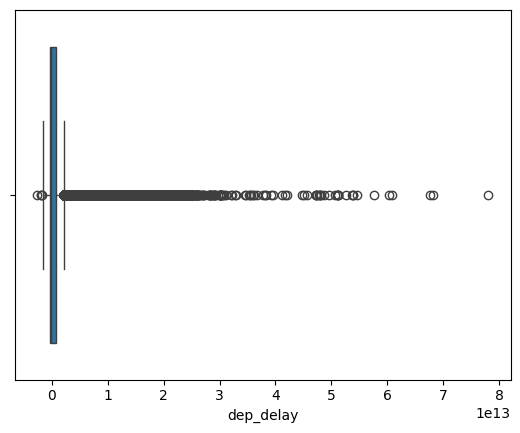

        month  day            dep_time      sched_dep_time       dep_delay  \
151         1    1 2013-01-02 08:48:00 2013-01-01 18:35:00 0 days 14:13:00   
645         1    1 2013-01-01 18:15:00 2013-01-01 13:25:00 0 days 04:50:00   
669         1    1 2013-01-01 18:42:00 2013-01-01 14:22:00 0 days 04:20:00   
740         1    1 2013-01-01 20:06:00 2013-01-01 16:30:00 0 days 03:36:00   
794         1    1 2013-01-01 21:15:00 2013-01-01 17:00:00 0 days 04:15:00   
...       ...  ...                 ...                 ...             ...   
326353      9   29 2013-09-29 22:53:00 2013-09-29 20:00:00 0 days 02:53:00   
326358      9   29 2013-09-29 23:27:00 2013-09-29 19:42:00 0 days 03:45:00   
326828      9   30 2013-09-30 13:24:00 2013-09-30 08:30:00 0 days 04:54:00   
327244      9   30 2013-09-30 19:51:00 2013-09-30 16:49:00 0 days 03:02:00   
327333      9   30 2013-09-30 21:59:00 2013-09-30 18:45:00 0 days 03:14:00   

                  arr_time      sched_arr_time       arr_delay 

In [16]:
sns.boxplot(x=pd.to_numeric(df['dep_delay']))
plt.show()

# # Remove outliers in dep_delay
z_scores = np.abs(stats.zscore(pd.to_numeric(df['dep_delay'])))
print((df[z_scores >= 4]))
print((df[z_scores >= 4])['dep_delay'].describe())
# # df = df[z_scores < 3]
# print(df.shape)
# sns.boxplot(x=df['dep_delay'])
# plt.show()

## Inference
- The Outliers are only found in dep_delay and arr_delay columns.
- These are not mistakes, but rather, real delays that are extremely long.
- Hence, we don't want to lose any information about the outliers.
- We will be including the outliers in training of our ML models.
- The impact of outliers can be sensitive for regression, but using a technique called Box-Cox transformation, we can significantly reduce the impact and give our model an opportunity to learn even from the Outliers.

## Summary Statistics

In [18]:
# Summary Statistics For Numerical Features

df.describe().T

,count,mean,min,25%,50%,75%,max,std
month,327346.0,6.564803,1.0,4.0,7.0,10.0,12.0,3.413444
day,327346.0,15.740825,1.0,8.0,16.0,23.0,31.0,8.777376
dep_time,327346,2013-07-03 18:15:21.925974272,2013-01-01 05:17:00,2013-04-05 05:56:15,2013-07-04 09:53:30,2013-10-01 18:12:45,2014-01-01 00:26:00,NaN
sched_dep_time,327346,2013-07-03 18:02:48.616631808,2013-01-01 05:15:00,2013-04-05 06:00:00,2013-07-04 09:54:30,2013-10-01 18:14:45,2013-12-31 23:59:00,NaN
dep_delay,327346,0 days 00:12:33.309342408,-1 days +23:17:00,-1 days +23:55:00,-1 days +23:58:00,0 days 00:11:00,0 days 21:41:00,0 days 00:40:03.941255135
arr_time,327346,2013-07-03 20:32:40.181703680,2013-01-01 07:02:00,2013-04-05 07:53:30,2013-07-04 11:55:30,2013-10-01 20:09:45,2014-01-01 04:49:00,NaN
sched_arr_time,327346,2013-07-03 20:25:46.459098368,2013-01-01 07:06:00,2013-04-05 08:00:00,2013-07-04 12:10:00,2013-10-01 20:32:00,2014-01-01 04:45:00,NaN
arr_delay,327346,0 days 00:06:53.722605438,-1 days +22:34:00,-1 days +23:43:00,-1 days +23:55:00,0 days 00:14:00,0 days 21:12:00,0 days 00:44:37.997501411
flight,327346.0,1943.104501,1.0,544.0,1467.0,3412.0,8500.0,1621.523684
air_time,327346,0 days 02:17:18.255729411,0 days 00:33:00,0 days 01:35:00,0 days 02:18:00,0 days 02:54:00,0 days 07:18:00,0 days 00:49:57.076558982


# Univariate Analysis

In [19]:
# Pre-Define Functions to use throughout Univariate Analysis
color = 'blue'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

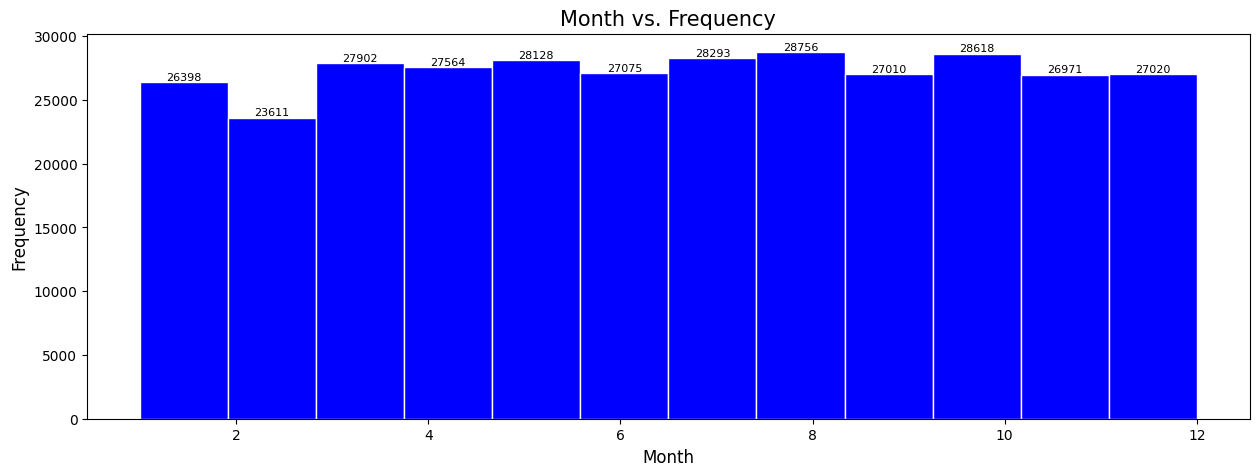

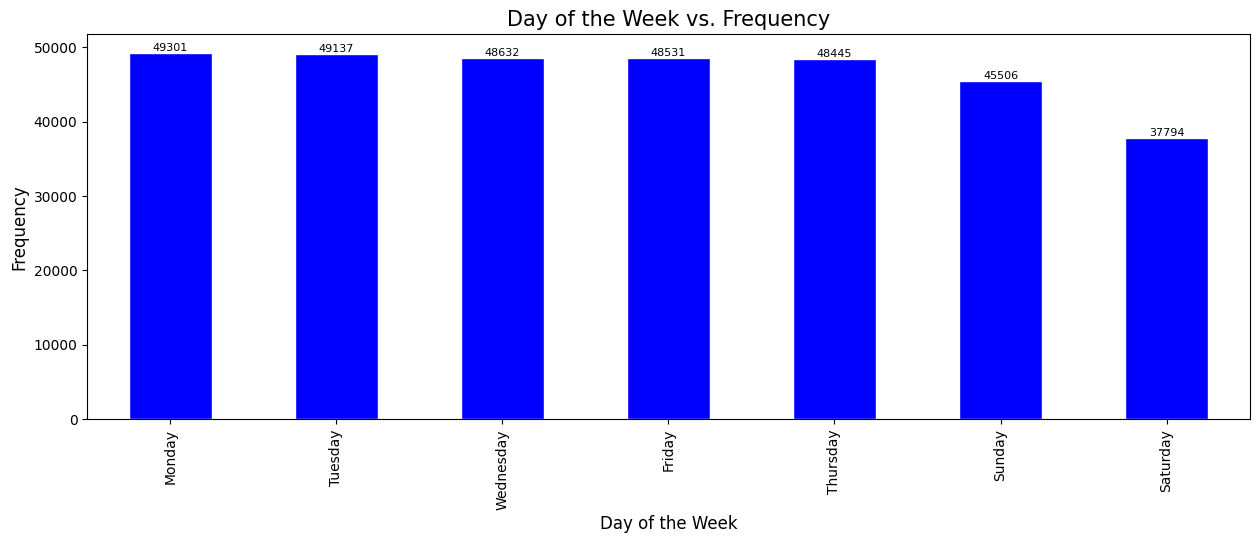

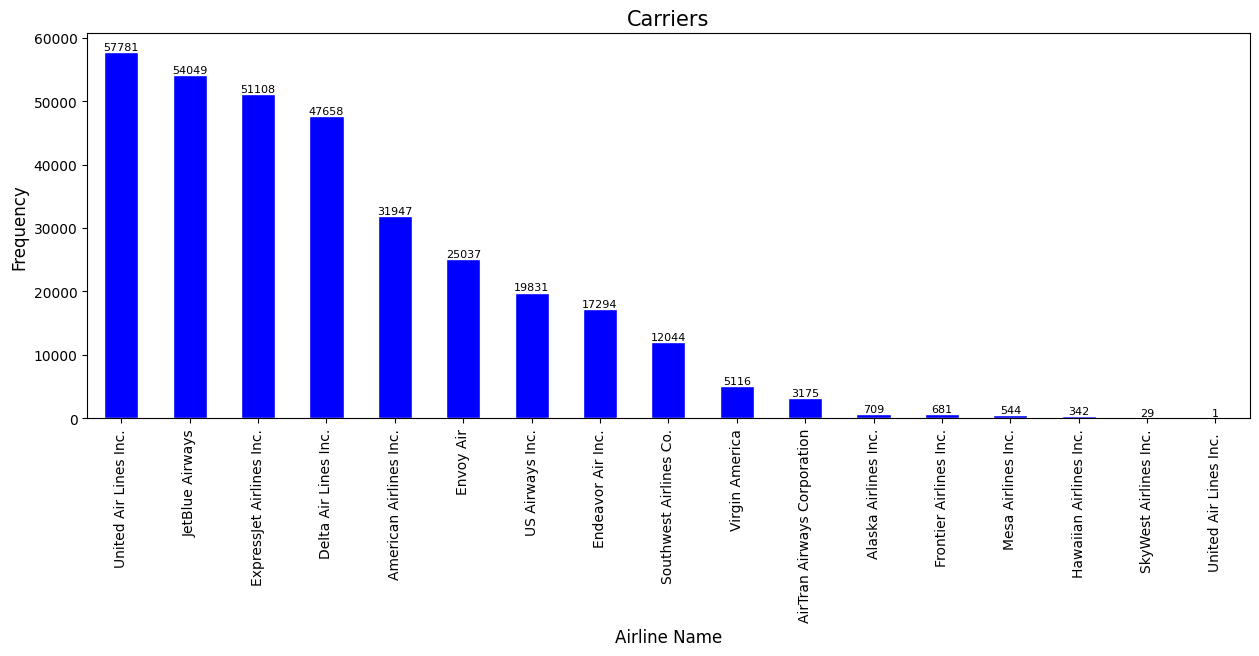

In [25]:
# Frequency barplots: month, day of the week, carrier, destination, origin

# Plot months vs. frequency
plot_hist(df['month'], bins=12, title='Month vs. Frequency', xlabel='Month')

# Plot day of the week vs. frequency
# New column day of the week
df['day_of_week'] = df['sched_dep_time'].dt.strftime('%A')
plot_bar(df['day_of_week'], title='Day of the Week vs. Frequency', xlabel='Day of the Week')



# Plot carrier vs. frequency
plot_bar(df['name'], title='Carriers', xlabel='Airline Name')



## Inference

- The month of August has the highest number of flights, and the Month of February has the lowest.
- Most flights are during the weekdays.
- United Air has the highest no. of flights in this dataset.

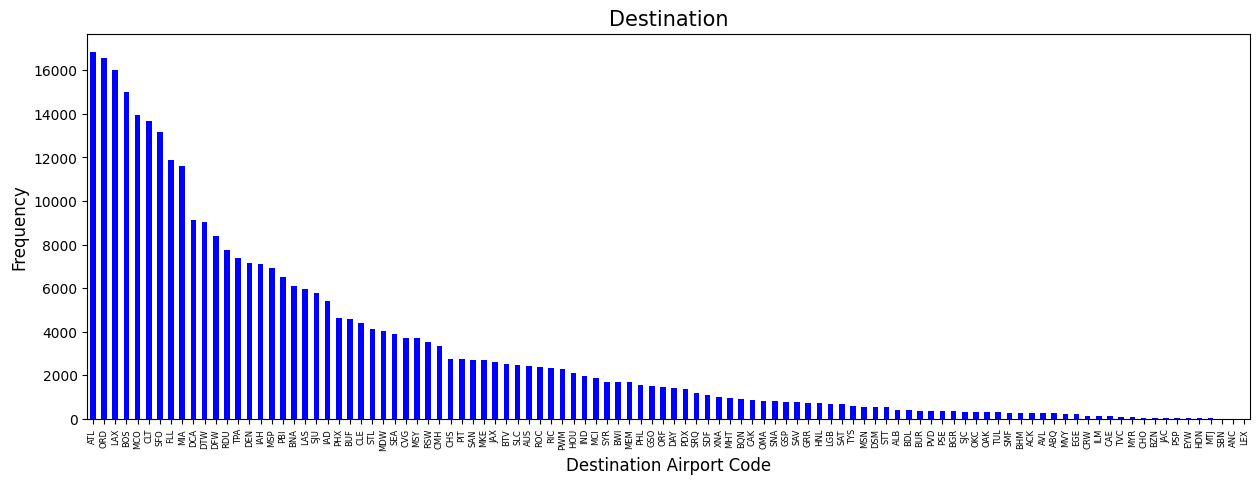

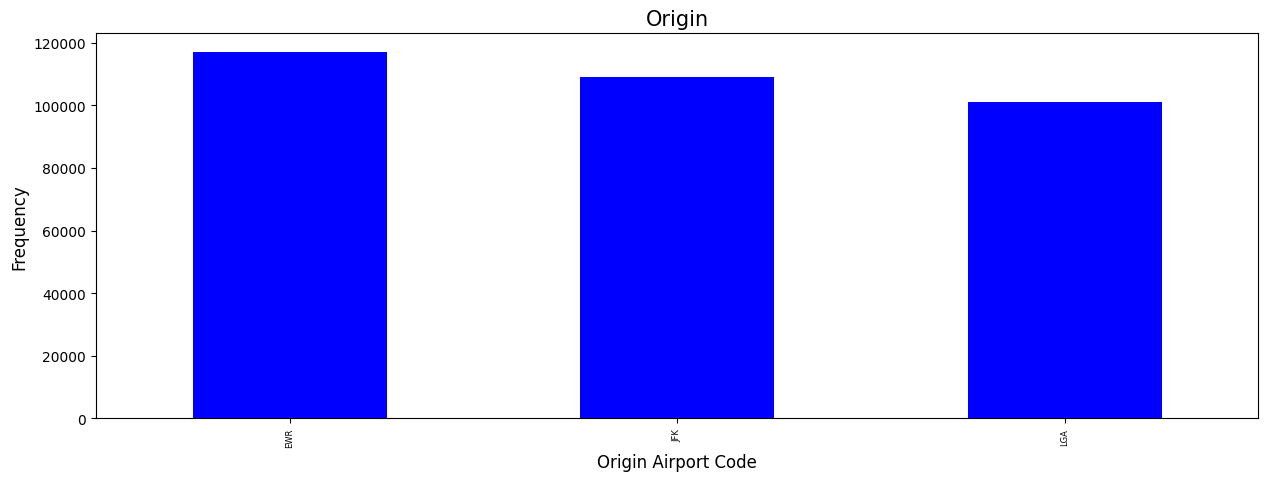

In [21]:
# Plot destination vs. frequency
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color='blue')
plt.title('Destination', fontsize=15)
plt.xlabel('Destination Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

# Plot origin vs. frequency
plt.figure(figsize=(15,5))
df['origin'].value_counts().plot(kind='bar', color='blue')
plt.title('Origin', fontsize=15)
plt.xlabel('Origin Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

## Inference
- Most flights in this dataset originate from EWR
- ATL is the most frequent destination followed by ORD and LAX

# Bivariate Analysis

In [22]:
# Pre-Define functions
colors_box = sns.dark_palette("brown", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("turquoise", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot violin plots
def plot_violin(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.violinplot(x=x, y=y, palette=colors_box)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=colors_box)
C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x=x, y=y, palette=colors_box)


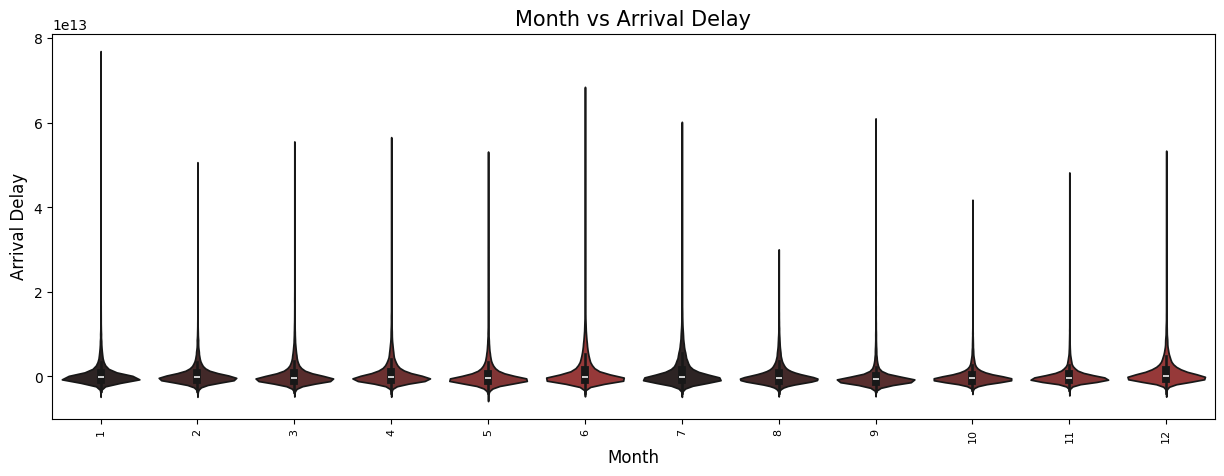

C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=colors_box)
C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x=x, y=y, palette=colors_box)


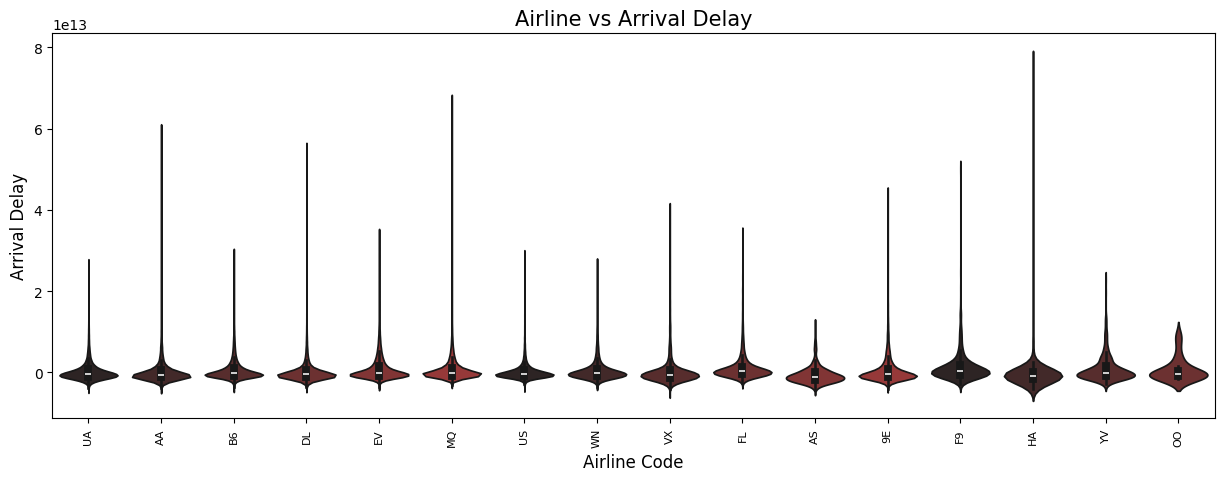

In [23]:
plot_violin(df['month'], pd.to_numeric(df['arr_delay']), 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

plot_violin(df['carrier'], pd.to_numeric(df['arr_delay']), 'Airline vs Arrival Delay', 'Airline Code', 'Arrival Delay')

## Inference
- June, July, and December have a higher variance in Arrival Delay as compared to other months
- Airline codes F9 and HA, along with a few other airlines show a wider variance in arrival delays

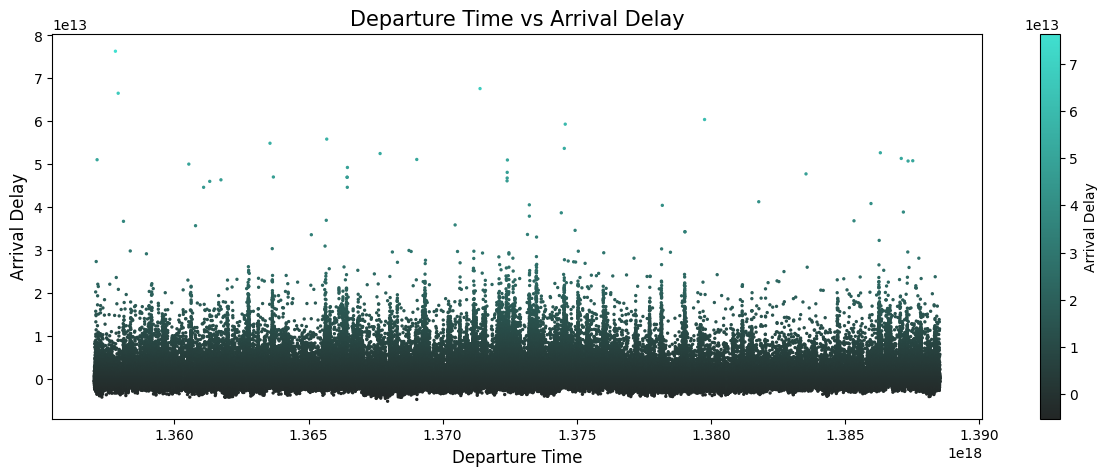

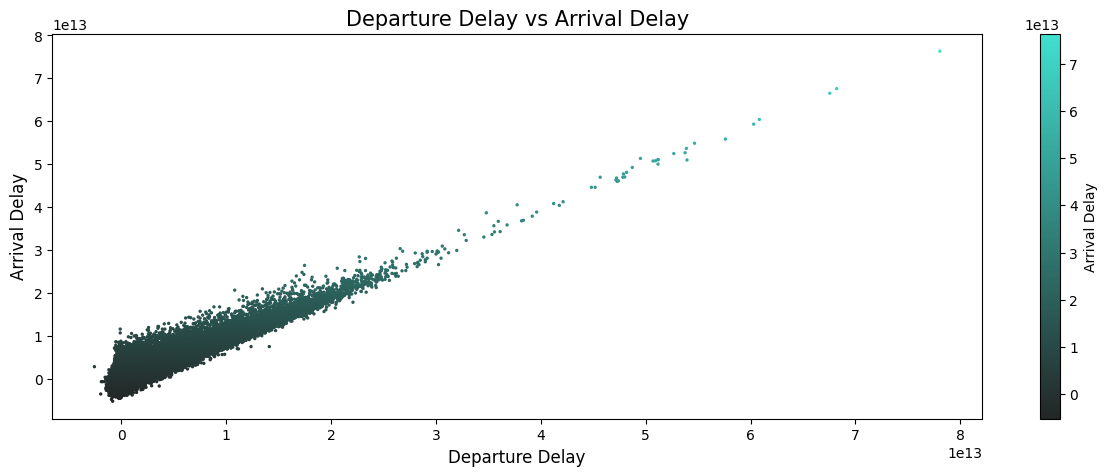

In [26]:
# Departure Time vs. Arrival Delay

plot_scatter(pd.to_numeric(df['dep_time']), pd.to_numeric(df['arr_delay']), 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

# Departure Delay vs. Arrival Delay

plot_scatter(pd.to_numeric(df['dep_delay']), pd.to_numeric(df['arr_delay']), 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

## Inference
- We can see that the flights departing later in the day tend to have a higher chance of delay.
- We can also see that there is a strong positive correlation between Depature delay and Arrival delay.

C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=colors_box)
C:\Users\karth\AppData\Local\Temp\ipykernel_13984\831101512.py:20: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(x=x, y=y, palette=colors_box)


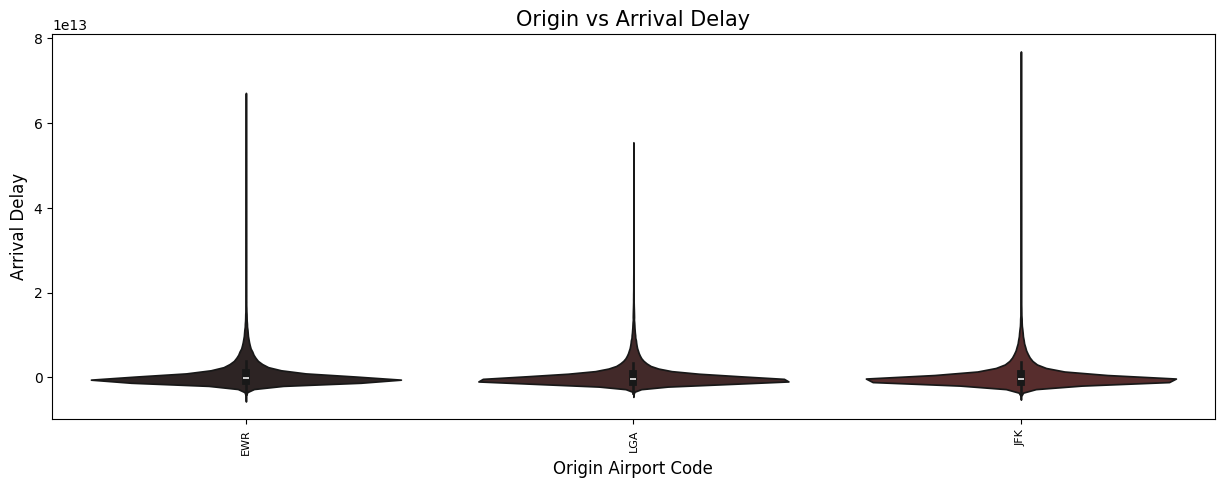

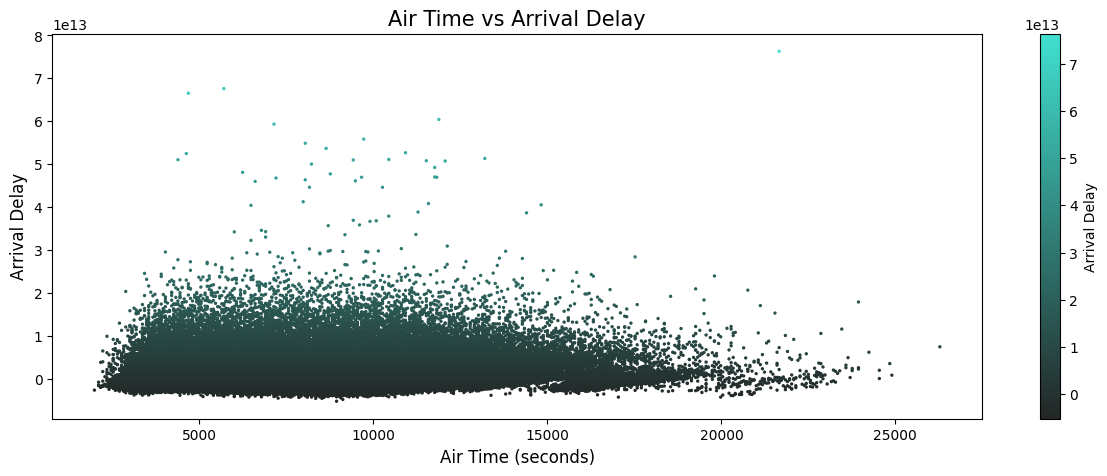

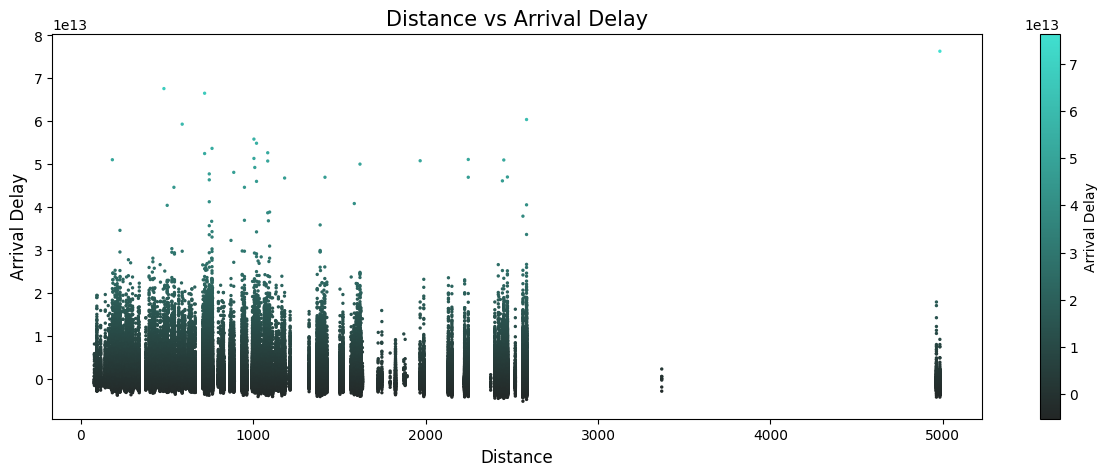

In [31]:
# Origin vs. Arrival Delay (Violin)

plot_violin(df['origin'], pd.to_numeric(df['arr_delay']), 'Origin vs Arrival Delay', 'Origin Airport Code', 'Arrival Delay')

# Air time vs. Arrival Delay (Scatter)

plot_scatter(pd.to_numeric(df['air_time'].dt.total_seconds()), pd.to_numeric(df['arr_delay']), 'Air Time vs Arrival Delay', 'Air Time (seconds)', 'Arrival Delay')

# Distance vs. Arrival Delay (Scatter)

plot_scatter(df['distance'], pd.to_numeric(df['arr_delay']), 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

## Inference
- We can see that short-haul flights tend to have delays more often than long-haul flights.

# Mutlivariate Analysis

In [33]:
# We need to encode non-numerical values into numerical values before creating a correlation heatmap.

# List of non-numerical values:
# 1. carrier
# 2. origin
# 3. destination
# 4. day_of_week

# We need to convert dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, and air_time from datetime or time delta into numerical values.

# Create a new df
df_encoded = df.copy()

# Encode carrier
df_encoded['carrier'] = df_encoded['carrier'].astype('category').cat.codes

# Encode origin
df_encoded['origin'] = df_encoded['origin'].astype('category').cat.codes

# Encode destination
df_encoded['dest'] = df_encoded['dest'].astype('category').cat.codes

# Encode day_of_week
df_encoded['day_of_week'] = df_encoded['day_of_week'].astype('category').cat.codes

# Encode dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, and air_time (disregard date, we only want time in minutes)
df_encoded['dep_time'] = df_encoded['dep_time'].dt.hour * 60 + df_encoded['dep_time'].dt.minute
df_encoded['sched_dep_time'] = df_encoded['sched_dep_time'].dt.hour * 60 + df_encoded['sched_dep_time'].dt.minute
df_encoded['dep_delay'] = df_encoded['dep_delay'].dt.total_seconds() / 60
df_encoded['arr_time'] = df_encoded['arr_time'].dt.hour * 60 + df_encoded['arr_time'].dt.minute
df_encoded['sched_arr_time'] = df_encoded['sched_arr_time'].dt.hour * 60 + df_encoded['sched_arr_time'].dt.minute
df_encoded['arr_delay'] = df_encoded['arr_delay'].dt.total_seconds() / 60
df_encoded['air_time'] = df_encoded['air_time'].dt.total_seconds() / 60

# Print the updated dataframe
print(df_encoded)

        month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0           1    1       317             315        2.0       510   
1           1    1       333             329        4.0       530   
2           1    1       342             340        2.0       563   
3           1    1       344             345       -1.0       604   
4           1    1       354             360       -6.0       492   
...       ...  ...       ...             ...        ...       ...   
327341      9   30      1360            1365       -5.0      1414   
327342      9   30      1360            1370      -10.0      1427   
327343      9   30      1361            1366       -5.0      1425   
327344      9   30      1387            1375       12.0      1439   
327345      9   30      1429            1439      -10.0       205   

        sched_arr_time  arr_delay  carrier  flight  origin  dest  air_time  \
0                  499       11.0       11    1545       0    43     193.0   
1              

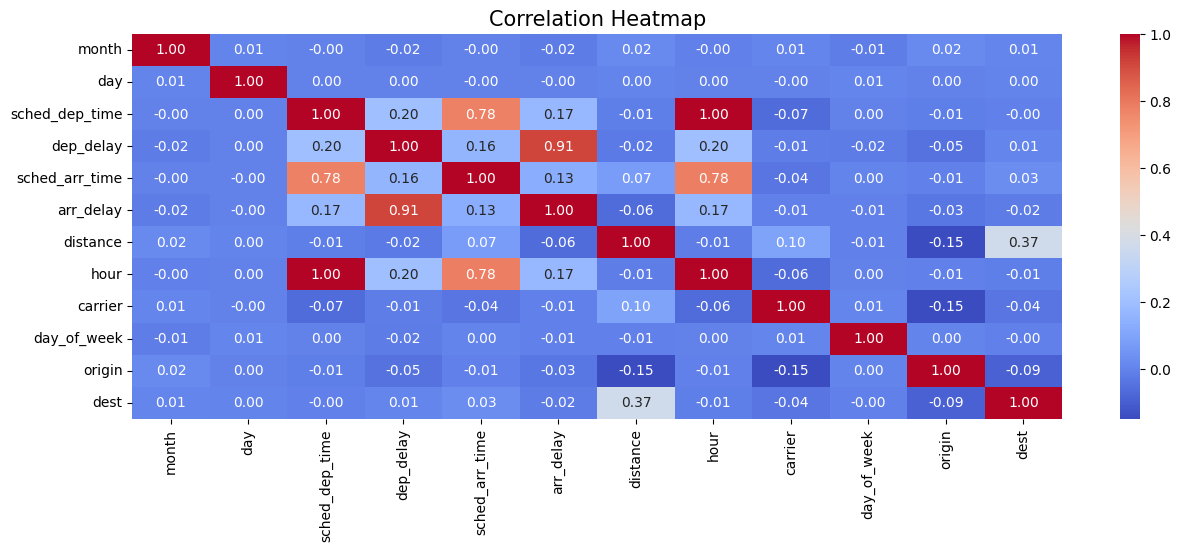

In [35]:
# Correlation heatmap with the variables:
'''
1. month
2. day
3. sched_dep_time
4. dep_delay
5. sched_arr_time
6. arr_delay
7. distance
8. hour
9. carrier
10. day_of_week
11. origin
12. dest
'''

# Drop all other columns other than the above 12 columns
df_encoded.drop(columns=['name', 'dep_time', 'arr_time', 'name', 'air_time'], inplace=True)

# Create a correlation matrix
corr = df_encoded[['month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time', 'arr_delay', 'distance', 'hour', 'carrier', 'day_of_week', 'origin', 'dest']].corr()

# Plot the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()